In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
DATA_PATH = '../data/Environment_Temperature_change_E_All_Data_NOFLAG.csv'
DATA_ROMANIA_PATH = '../data/Environment_Temperature_change_ROMANIA.csv'
data_frame = pd.read_csv(DATA_PATH, encoding='cp1252')
print(data_frame.shape)

(9656, 66)


In [55]:
country = 'Romania'
df = data_frame.loc[((data_frame.Area == country) & (data_frame.Element == 'Temperature change') & (data_frame.Months != 'Meteorological year') &
                     ( data_frame['Months Code'] >= 7001) & (data_frame['Months Code'] <= 7012)) ]
df.to_csv(DATA_ROMANIA_PATH, index=False )

df

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
6154,183,Romania,7001,January,7271,Temperature change,°C,-0.164,1.810,-6.143,...,-0.305,1.081,1.134,1.764,3.608,2.896,0.546,-2.680,3.590,1.186
6156,183,Romania,7002,February,7271,Temperature change,°C,1.070,-1.159,-1.901,...,1.086,-0.809,-5.220,2.789,3.190,1.568,6.388,2.201,0.826,3.258
6158,183,Romania,7003,March,7271,Temperature change,°C,2.669,-1.974,-2.377,...,1.162,0.865,1.742,0.066,4.336,1.706,2.814,4.436,-0.213,3.932
6160,183,Romania,7004,April,7271,Temperature change,°C,2.689,0.956,-0.157,...,0.949,0.418,2.425,2.365,1.379,0.035,3.148,0.010,5.036,1.254
6162,183,Romania,7005,May,7271,Temperature change,°C,-1.394,0.627,1.116,...,1.213,0.612,1.839,2.640,0.447,1.624,0.174,0.828,3.490,0.421
6164,183,Romania,7006,June,7271,Temperature change,°C,0.756,-0.994,0.616,...,1.133,1.159,2.869,1.452,0.084,1.107,2.283,2.211,2.061,3.712
6166,183,Romania,7007,July,7271,Temperature change,°C,-0.544,-0.665,1.533,...,1.929,1.381,4.372,1.020,1.248,2.766,1.941,1.553,1.429,1.167
6168,183,Romania,7008,August,7271,Temperature change,°C,-0.058,1.716,1.941,...,2.976,1.652,2.830,2.347,1.476,3.019,1.504,3.041,3.264,2.972
6170,183,Romania,7009,September,7271,Temperature change,°C,0.497,-0.093,1.667,...,0.175,3.210,2.930,-0.839,1.064,2.871,2.086,1.498,1.799,1.903
6172,183,Romania,7010,October,7271,Temperature change,°C,0.875,0.510,0.067,...,-2.149,-0.823,2.472,1.118,0.672,-0.023,-1.124,0.821,2.816,2.708


In [56]:
x, y = [], []
for an in range(1961, 2020):
    for luna in range(0, 12):
        x_point = (an - 1961 ) * 12 + luna
        y_point = df.iloc[luna][f'Y{an}']
        x.append(x_point)
        y.append(y_point)

Text(0.5, 1.0, 'Romania')

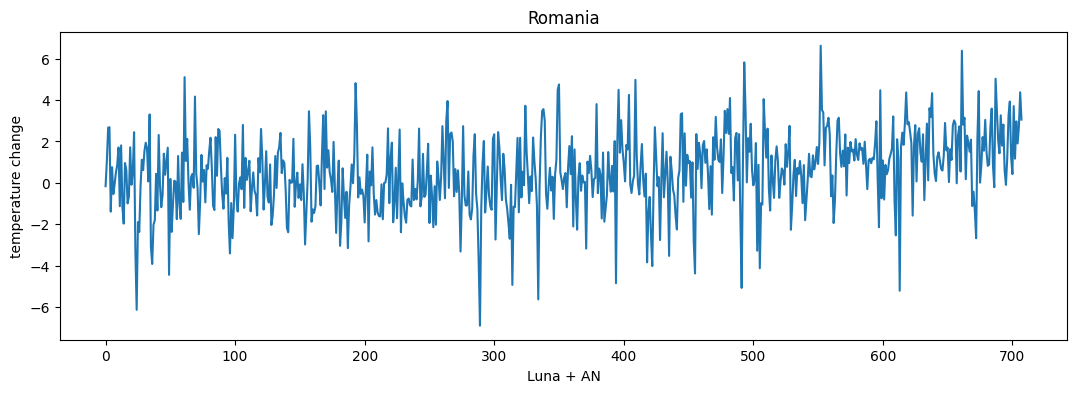

In [57]:

plt.figure(figsize=[13,4])
plt.plot(x, y)
plt.xlabel('Luna + AN')
plt.ylabel('temperature change')
# plt.xticks(year_columns[::3])
plt.title(country)

Text(0.5, 1.0, 'Romania')

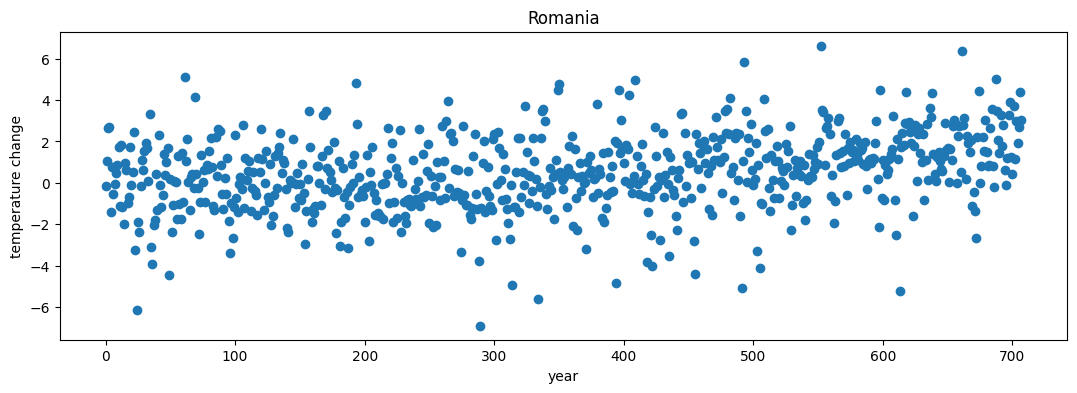

In [58]:
plt.figure(figsize=[13,4])
plt.scatter(x, y)
plt.xlabel('year')
plt.ylabel('temperature change')
# plt.xticks(year_columns[::3])
plt.title(country)

Text(0.5, 1.0, 'Romania')

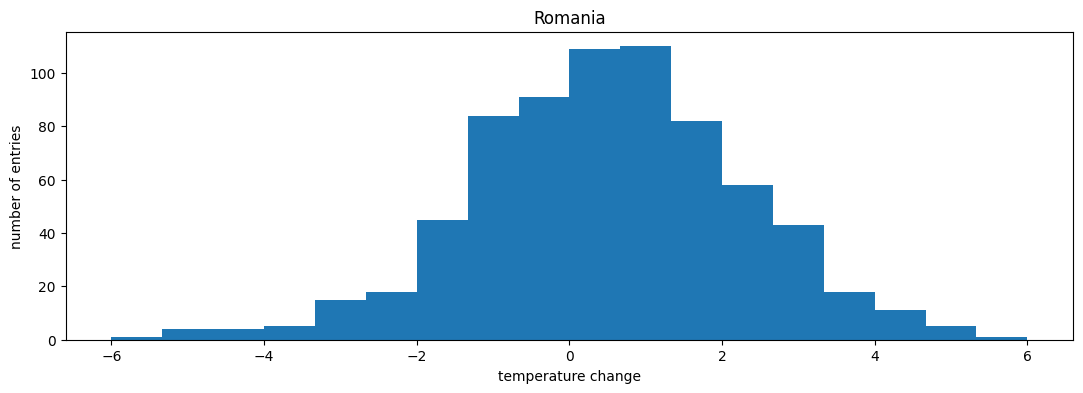

In [59]:
plt.figure(figsize=[13,4])
bin_range = (-6,6)
bin_count = 18
hist, bin_edges = np.histogram(y, bins=bin_count, range=bin_range)

plt.hist(bin_edges[:-1], bin_edges, weights=hist)
plt.xlabel('temperature change')
plt.ylabel('number of entries')
plt.title(country)

In [59]:
# (0 -> 720)   -> y
# predict(Luna, an) -> model((an - 1961 * 12) + luna)

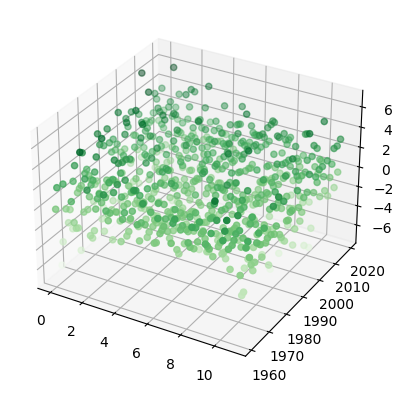

In [68]:
x, y , z = [], [], []
for an in range(1961, 2020):
    for luna in range(0, 12):
        x_point = luna
        y_point = an
        z_point = df.iloc[luna][f'Y{an}']
        x.append(x_point)
        y.append(y_point)
        z.append(z_point)

ax = plt.axes(projection = '3d')
ax.scatter3D(x,y,z, c = z, cmap = 'Greens')

In [71]:
ax.contour3D(x,y, lambda x,y:  df.iloc[x][f'Y{y}'] , 50, cmap = 'binary')


TypeError: Input z must be 2D, not 0D